<a href="https://colab.research.google.com/github/imcalledaditi/Face-Mask-Detection-using-CNN-DL-/blob/main/Face_Mask_Detection_using_CNN(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
#confi the path Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


import dataset


In [4]:
#api
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:09<00:00, 19.2MB/s]
100% 163M/163M [00:09<00:00, 17.5MB/s]


In [5]:
#extract the zip file of the dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
#list all the directories or the folders i have
!ls

data  face-mask-dataset.zip  sample_data


importing the dependencies


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #used for image processing
from google.colab.patches import cv2_imshow
from PIL import Image #a lib used for manipulating imgages
from sklearn.model_selection import train_test_split

In [8]:
#variable
with_mask_files = os.listdir  ('/content/data/with_mask') #listdir is all the filenames presnt in a folder
print (with_mask_files[0:5]) #1st 5 names
print (with_mask_files[-5:]) #last 5 name

['with_mask_3224.jpg', 'with_mask_245.jpg', 'with_mask_1707.jpg', 'with_mask_1716.jpg', 'with_mask_469.jpg']
['with_mask_3615.jpg', 'with_mask_3203.jpg', 'with_mask_2786.jpg', 'with_mask_2985.jpg', 'with_mask_2388.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print (without_mask_files[0:5])
print (without_mask_files[-5:])

['without_mask_3038.jpg', 'without_mask_1975.jpg', 'without_mask_2213.jpg', 'without_mask_1624.jpg', 'without_mask_3167.jpg']
['without_mask_2411.jpg', 'without_mask_199.jpg', 'without_mask_2425.jpg', 'without_mask_3135.jpg', 'without_mask_2036.jpg']


In [10]:
print ('Number of with masked images:', len(with_mask_files) )
print ('Number of without masked images:', len(without_mask_files) )

Number of with masked images: 3725
Number of without masked images: 3828


**Create Lables for the two classes of IMGs**

with mask --> 1
without mask --> 0

In [11]:
with_mask_lables = [1]*3725
without_mask_lables = [0]*3828

In [12]:
print (with_mask_lables[0:5])
print (without_mask_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_lables))
print(len(without_mask_lables))

3725
3828


In [14]:
lables = with_mask_lables + without_mask_lables
print (len(lables)) #total lables
print (lables[0:5])
print (lables[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displayig the imgs

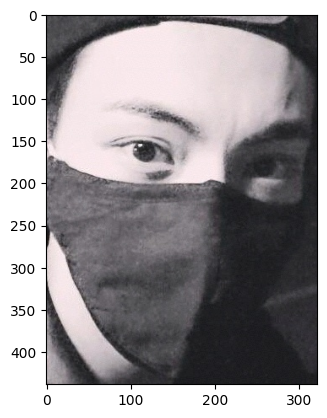

In [15]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1315.jpg')
imgplot = plt.imshow(img) #displying as matpltlib,plt ---> matpltlib.pyplt
plt.show()

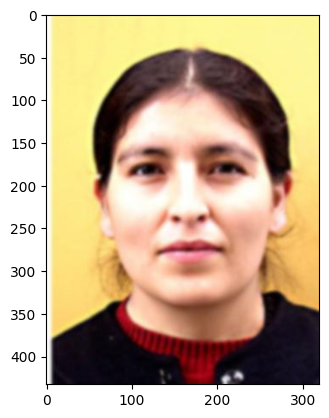

In [16]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1200.jpg')
imgplot = plt.imshow(img) #displying as matpltlib,plt ---> matpltlib.pyplt
plt.show()

**Image processing**



1.   resize img
2.   cov img to numpy arrays






In [17]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data) #the type of the data

list

In [19]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 245, 245],
        [251, 251, 251],
        [248, 248, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [247, 247, 247],
        [244, 244, 244],
        [240, 240, 240]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [241, 241, 241],
        [246, 246, 246],
        [242, 242, 242]],

       ...,

       [[255, 255, 255],
        [250, 250, 250],
        [244, 244, 244],
        ...,
        [249, 249, 249],
        [240, 240, 240],
        [252, 252, 252]],

       [[253, 253, 253],
        [253, 253, 253],
        [245, 245, 245],
        ...,
        [239, 239, 239],
        [247, 247, 247],
        [255, 255, 255]],

       [[244, 244, 244],
        [247, 247, 247],
        [246, 246, 246],
        ...,
        [244, 244, 244],
        [249, 249, 249],
        [247, 247, 247]]], dtype=uint8)
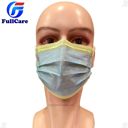

In [20]:
data[0]

In [21]:
type (data[0])

numpy.ndarray

In [22]:
data [0].shape

(128, 128, 3)

In [23]:
#converting img list(data) and lable list to numpy array
x = np.array(data)
y = np.array(lables)

In [24]:
type(x)

numpy.ndarray

In [25]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(y)

[1 1 1 ... 0 0 0]


**training and testing**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
#x is image array and y is lable array

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
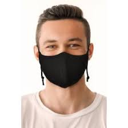

In [30]:
x_train[0]

In [31]:
x_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**building a convolutional neural network**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [35]:
number_of_class = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten()) #should be passed as a single dimention, 2d converted to vector (kinda)

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
#if no dropout the model might get overfitted

model.add(keras.layers.Dense(number_of_class, activation = 'sigmoid')) #no.of class is 2 #sigmoid is used for binary classification prob


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


softmax is another activation layaer that can be used for multiclass class prob

In [36]:
#compile the neural networks (set optimization and loss fuction matrix for neural network)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc']) #acc means accuracy

**Training the neural network**

In [37]:
history = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - acc: 0.6725 - loss: 0.6600 - val_acc: 0.8711 - val_loss: 0.3129
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - acc: 0.8820 - loss: 0.3083 - val_acc: 0.9058 - val_loss: 0.2314
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - acc: 0.9026 - loss: 0.2466 - val_acc: 0.8843 - val_loss: 0.2711
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9082 - loss: 0.2138 - val_acc: 0.9008 - val_loss: 0.2352
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9412 - loss: 0.1569 - val_acc: 0.9306 - val_loss: 0.2082


validation_split = 0.1
The validation_split parameter reserves a portion of the training data to evaluate the model’s performance during training. Setting validation_split = 0.1 means that 10% of the training data is set aside for validation, while the remaining 90% is used for training. This helps monitor how well the model generalizes to unseen data after each epoch, ensuring that it doesn't overfit to the training data.

epochs = 5
The epochs parameter defines the number of times the entire training dataset is passed through the model during training. When epochs = 5, the model processes all the training data five times, refining its weights with each iteration. This allows the model to gradually improve its performance, but care must be taken not to overtrain, which can lead to overfitting.


**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9206 - loss: 0.2454
Test Accuracy = 0.9245532751083374


my training accuracy is 94% and my test accuracy is 92%

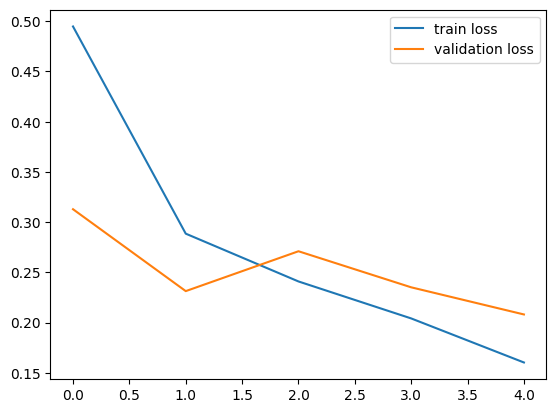

In [41]:
h = history

#plot the loss values
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

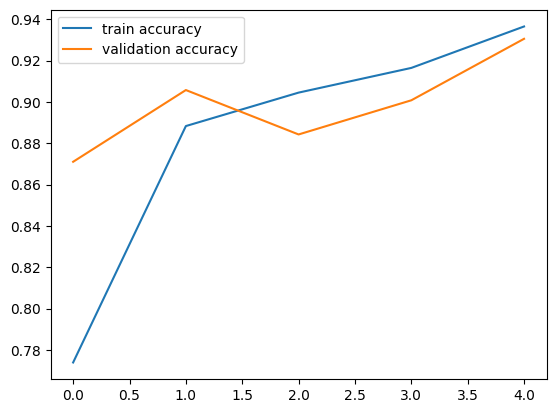

In [42]:
h = history

#plot the accuracy values
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**